In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0
test_images = test_images/ 255.0

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-11 00:38:00.216482: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-11 00:38:00.217344: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2022-11-11 00:38:28.099581: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1875 [..............................] - ETA: 11:45 - loss: 2.5189 - accuracy: 0.0000e+00

2022-11-11 00:38:28.333237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4967 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3768 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3422 - accuracy: 0.8743
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3173 - accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2999 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2845 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2719 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2615 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2523 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2433 - accura

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

2022-11-11 00:40:14.065171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3713 - accuracy: 0.8687 - 1s/epoch - 4ms/step

Test loss: 0.3712851405143738

Test accuracy: 0.8687000274658203


In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

110/313 [=========>....................] - ETA: 0s

2022-11-11 00:42:08.484774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 1ms/step


9

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [14]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  i = 0

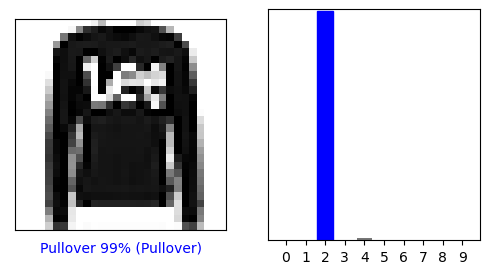

In [16]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()